In [1]:
import torch
from PIL import Image


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Try github
!git clone https://github.com/salesforce/LAVIS.git

fatal: destination path 'LAVIS' already exists and is not an empty directory.


In [2]:
%cd LAVIS

/content/LAVIS


In [5]:
!pip install salesforce-lavis

In [6]:
!pip install -r requirements.txt

  Using cached transformers-4.33.2-py3-none-any.whl.metadata (119 kB)
  Using cached easydict-1.9.tar.gz (6.4 kB)
  Preparing metadata (setup.py) ... done
  Using cached pyyaml_env_tag-0.1-py3-none-any.whl.metadata (4.1 kB)
ERROR: Could not find a version that satisfies the requirement open3d==0.13.0 (from versions: 0.16.0, 0.17.0, 0.18.0)
ERROR: No matching distribution found for open3d==0.13.0


In [5]:
!python --version

Python 3.10.12


In [6]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [3]:
!ls

app		    docs	 MANIFEST.in	   run_scripts		      train.py
assets		    evaluate.py  projects	   salesforce_lavis.egg-info
CODE_OF_CONDUCT.md  examples	 pyproject.toml    SECURITY.md
CODEOWNERS	    lavis	 README.md	   setup.py
dataset_card	    LICENSE.txt  requirements.txt  tests


In [8]:
pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.87 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
chex 0.1.87 requires jaxlib>=0.4.27, but you have jaxlib 0.4.23+cuda12.cudnn89 which is incompatible.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
optax 0.2.3 requires

In [3]:
from lavis.models import load_model_and_preprocess

  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore

  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore

  deprecate(



In [4]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. BLIP

In [5]:
blip, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)

  warnings.warn(

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.35G/1.35G [00:06<00:00, 207MB/s]
  checkpoint = torch.load(cached_file, map_location="cpu")



In [6]:
from lavis.datasets.builders import dataset_zoo

In [7]:
!mkdir -p /content/lavis/coco/images/
!wget http://images.cocodataset.org/zips/val2014.zip -P /content/lavis/coco/images/


--2024-11-03 20:33:24--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.15.185.186, 54.231.135.225, 52.216.185.251, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.15.185.186|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘/content/lavis/coco/images/val2014.zip’

val2014.zip         100%[===================>]   6.19G  36.5MB/s    in 2m 31s  

2024-11-03 20:35:55 (42.0 MB/s) - ‘/content/lavis/coco/images/val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!cp /content/lavis/coco/images/val2014.zip /content/drive/MyDrive/val2014.zip


In [8]:
!unzip /content/lavis/coco/images/val2014.zip -d /content/lavis/coco/images/

Streaming output truncated to the last 5000 lines.
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000535608.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000279145.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000243495.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000225791.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000428067.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000059383.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000558498.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000376123.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000191304.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000171062.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_000000014549.jpg  
 extracting: /content/lavis/coco/images/val2014/COCO_val2014_00000012

In [9]:
from lavis.datasets.builders import load_dataset

In [10]:
vis_path = "/content/lavis/coco/images/"
dataset = load_dataset("aok_vqa", vis_path=vis_path)

100%|██████████| 11.4M/11.4M [00:00<00:00, 59.9MB/s]


100%|██████████| 752k/752k [00:00<00:00, 87.4MB/s]


100%|██████████| 52.1k/52.1k [00:00<00:00, 45.0MB/s]


100%|██████████| 2.05M/2.05M [00:00<00:00, 130MB/s]

Using downloaded and verified file: /export/home/.cache/lavis/aokvqa/annotations/specialized_vocab_train_lavis.json


In [11]:
dataset['val'][1]

{'image': <PIL.Image.Image image mode=RGB size=640x481>,
 'text_input': 'Which number birthday is probably being celebrated?',
 'question_id': '2Aq5RiEn7eyfWjEbpuYT2o',
 'instance_id': '1',
 'choices': ['one', 'ten', 'nine', 'thirty'],
 'correct_choice_idx': 3,
 'direct_answers': ['thirty',
  '30th',
  'thirty',
  'thirty',
  'thirty',
  '30th',
  'thirty',
  'thirty',
  'thirty',
  'thirty']}

In [ ]:
acc = 0
i = 0
for data in dataset['val']:
  question = data['text_input']
  raw_image = data['image']
  answer_candidates = data['choices']
  correct_choice = answer_candidates[data['correct_choice_idx']]

  # use "eval" processors for inference
  image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
  question = txt_processors["eval"](question)

  samples = {"image": image, "text_input": question}

  ans = blip.predict_answers(samples, answer_list=answer_candidates, inference_method="rank")

  if ans[0] == correct_choice:
    acc += 1
  i += 1
  if i%100 == 0:
    print('done 100')


done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100


In [ ]:
acc/i

0.6838427947598253

# Obj Detect Acc Eval on COCO

In [39]:

!mkdir -p /content/lavis/coco/objs/
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P /content/lavis/coco/objs/


--2024-11-03 21:14:59--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.137.68, 16.15.185.107, 3.5.25.142, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.137.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘/content/lavis/coco/objs/annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  21.1MB/s    in 6.9s    

2024-11-03 21:15:06 (35.2 MB/s) - ‘/content/lavis/coco/objs/annotations_trainval2017.zip’ saved [252907541/252907541]



In [40]:
!unzip /content/lavis/coco/objs/annotations_trainval2017.zip -d /content/lavis/coco/objs/

Archive:  /content/lavis/coco/objs/annotations_trainval2017.zip
  inflating: /content/lavis/coco/objs/annotations/instances_train2017.json  
  inflating: /content/lavis/coco/objs/annotations/instances_val2017.json  
  inflating: /content/lavis/coco/objs/annotations/captions_train2017.json  
  inflating: /content/lavis/coco/objs/annotations/captions_val2017.json  
  inflating: /content/lavis/coco/objs/annotations/person_keypoints_train2017.json  
  inflating: /content/lavis/coco/objs/annotations/person_keypoints_val2017.json  


In [46]:
import fiftyone as fo
# The directory containing the source images
data_path = "/content/lavis/coco/objs/val2017/"

# The path to the COCO labels JSON file
labels_path = "/content/lavis/coco/objs/annotations/instances_val2017.json"

# Import the dataset
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=data_path,
    labels_path=labels_path,
)

   5% |/--------------|  252/5000 [7.0s elapsed, 2.2m remaining, 28.5 samples/s]    


INFO:eta.core.utils:   5% |/--------------|  252/5000 [7.0s elapsed, 2.2m remaining, 28.5 samples/s]    


KeyboardInterrupt: 

In [44]:
dataset


Name:        2024.11.03.21.19.00
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField

loading annotations into memory...


  warnings.warn(



Done (t=1.09s)
creating index...
index created!


Processing images:   0%|          | 0/2 [00:00<?, ?it/s]

/content/lavis/coco/objs/val2017/000000397133.jpg {'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}


Processing images: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


/content/lavis/coco/objs/val2017/000000037777.jpg {'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | 

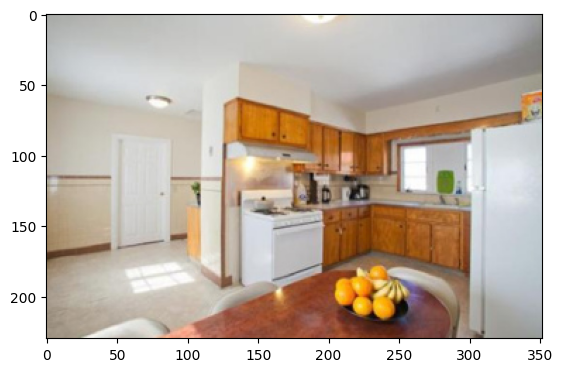

In [74]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from PIL import Image
import os
import json
from tqdm import tqdm

def evaluate_detr_on_coco(image_dir, annotation_file, num_images=None):
    """
    Evaluate DETR model on COCO dataset

    Args:
        image_dir: Path to directory containing images
        annotation_file: Path to COCO annotation file
        num_images: Number of images to evaluate (None for all)
    """
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load COCO annotations
    try:
        coco = COCO(annotation_file)
    except Exception as e:
        raise RuntimeError(f"Error loading COCO annotations: {e}")

    # Load model and processor
    try:
        processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101")
        model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-101")
        model = model.to(device)
        model.eval()
    except Exception as e:
        raise RuntimeError(f"Error loading DETR model: {e}")

    # Get COCO category mappings
    coco_ids = sorted(coco.getCatIds())  # Sort to ensure consistent ordering
    coco_id_to_continuous_id = {coco_id: idx for idx, coco_id in enumerate(coco_ids)}
    continuous_id_to_coco_id = {idx: coco_id for coco_id, idx in coco_id_to_continuous_id.items()}

    # Update model's label mapping to match COCO
    model.config.id2label = {idx: str(coco_id) for idx, coco_id in continuous_id_to_coco_id.items()}

    # Get image IDs to process
    img_ids = coco.getImgIds()
    if num_images is not None:
        img_ids = img_ids[:num_images]

    predictions = []

    # Process images with progress bar
    for img_id in tqdm(img_ids, desc="Processing images"):
        try:
            # Load and prepare image
            img_info = coco.loadImgs(img_id)[0]
            image_path = os.path.join(image_dir, img_info["file_name"])
            image = Image.open(image_path).convert("RGB")
            print(image_path, img_info)
            plt.imshow(image)

            # Prepare inputs
            inputs = processor(images=image, return_tensors="pt")
            inputs = {k: v.to(device) for k, v in inputs.items()}

            # Get predictions
            with torch.no_grad():
                outputs = model(**inputs)

            # Post-process predictions
            target_sizes = torch.tensor([[image.size[1], image.size[0]]])
            target_sizes = target_sizes.to(device)
            results = processor.post_process_object_detection(
                outputs,
                target_sizes=target_sizes,
                threshold=0.5
            )[0]

            # Convert to COCO format
            for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
                coco_id = continuous_id_to_coco_id.get(label.item())
                if coco_id is not None:
                    # Convert box format from [x1, y1, x2, y2] to [x, y, width, height]
                    box = box.cpu().tolist()
                    width = box[2] - box[0]
                    height = box[3] - box[1]

                    prediction = {
                        "image_id": img_id,
                        "category_id": coco_id,
                        "bbox": [box[0], box[1], width, height],
                        "score": score.cpu().item(),
                    }
                    predictions.append(prediction)

        except Exception as e:
            print(f"Error processing image {img_id}: {e}")
            continue

    # Save predictions
    pred_file = "detr_predictions.json"
    with open(pred_file, "w") as f:
        json.dump(predictions, f)

    # Evaluate using COCO API
    try:
        coco_pred = coco.loadRes(pred_file)
        coco_eval = COCOeval(coco, coco_pred, 'bbox')
        coco_eval.params.imgIds = img_ids  # Evaluate only on processed images
        coco_eval.evaluate()
        coco_eval.accumulate()
        coco_eval.summarize()

        return {
            'AP': coco_eval.stats[0],  # AP at IoU=0.50:0.95
            'AP50': coco_eval.stats[1],  # AP at IoU=0.50
            'AP75': coco_eval.stats[2],  # AP at IoU=0.75
            'APs': coco_eval.stats[3],   # AP for small objects
            'APm': coco_eval.stats[4],   # AP for medium objects
            'APl': coco_eval.stats[5],   # AP for large objects
        }

    except Exception as e:
        raise RuntimeError(f"Error during evaluation: {e}")

# Usage example

results = evaluate_detr_on_coco(
    image_dir=data_path,
    annotation_file=labels_path,
    num_images=2  # Set to None to evaluate all images
)
print("\nEvaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.3f}")

In [66]:
# Debug category mapping
print("COCO categories:", coco.cats)
print("Model labels:", model.config.id2label)
print("First few predictions:", predictions[:2] if predictions else "No predictions")

COCO categories: {1: {'supercategory': 'person', 'id': 1, 'name': 'person'}, 2: {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, 3: {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, 4: {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, 5: {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, 6: {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, 7: {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, 8: {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, 9: {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, 10: {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, 11: {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, 13: {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, 14: {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, 15: {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, 16: {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, 17: {'supercategory': 'animal', 'id': 17, 'name': 'cat'

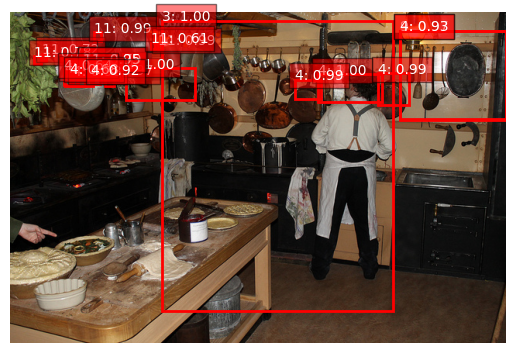

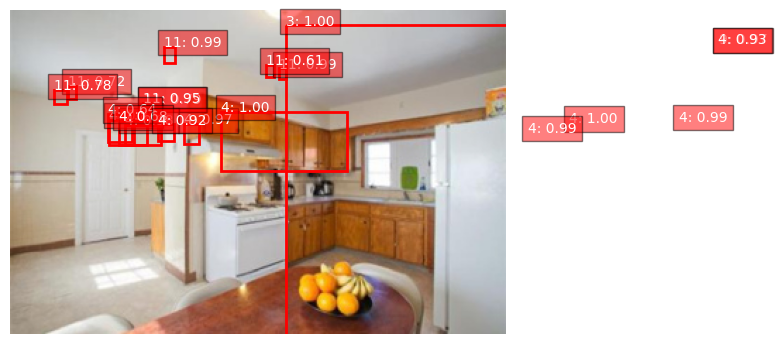

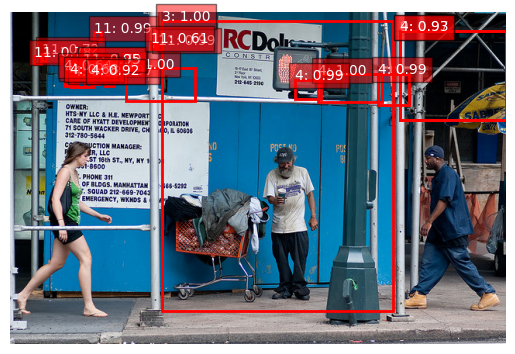

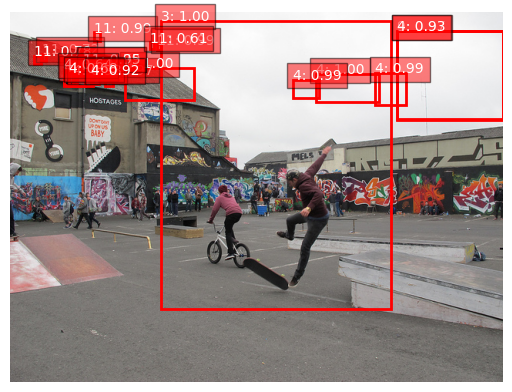

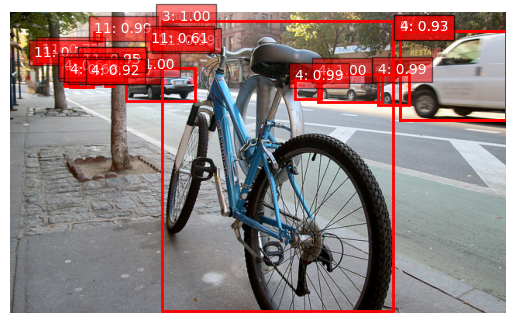

In [64]:
import matplotlib.pyplot as plt

for idx in range(5):
    img_id = coco.getImgIds()[idx]
    img_info = coco.loadImgs(img_id)[0]
    image_path = os.path.join(image_dir, img_info["file_name"])
    image = Image.open(image_path).convert("RGB")

    plt.imshow(image)
    plt.axis('off')

    # Overlay predictions
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        # if score > 0.5:  # only consider high-confidence predictions
            box = box.tolist()
            plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                                fill=False, color='red', linewidth=2))
            plt.text(box[0], box[1], f"{model.config.id2label[label.item()]}: {score:.2f}",
                     fontsize=10, color='white', bbox=dict(facecolor='red', alpha=0.5))

    plt.show()


In [57]:
from pycocotools.coco import COCO
import os

# Path to the annotations file
annotation_file = "/content/lavis/coco/objs/annotations/instances_val2017.json"

# Load the COCO dataset
coco = COCO(annotation_file)

# Get the image IDs and category IDs
image_ids = coco.getImgIds()
category_ids = coco.getCatIds()
print(f"Total images in validation set: {len(image_ids)}")
print(f"Total categories in COCO: {len(category_ids)}")


loading annotations into memory...
Done (t=1.18s)
creating index...
index created!
Total images in validation set: 5000
Total categories in COCO: 80


Image Info: {'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}


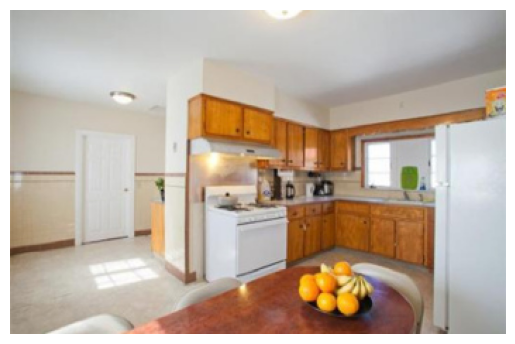

Number of annotations: 14
Category ID: 64, BBox: [102.49, 118.47, 7.9, 17.31]
Category ID: 62, BBox: [26.5, 215.25, 61.5, 14.5]
Category ID: 62, BBox: [116.5, 189.57, 50.0, 25.5]
Category ID: 67, BBox: [79.55, 178.05, 208.36, 48.7]
Category ID: 82, BBox: [301.84, 74.94, 49.62, 151.44]
Category ID: 52, BBox: [220.65, 178.93, 37.84, 27.91]
Category ID: 79, BBox: [137.47, 124.11, 60.18, 71.02]
Category ID: 81, BBox: [266.33, 134.49, 27.87, 3.47]
Category ID: 55, BBox: [215.77, 184.9, 17.26, 15.97]
Category ID: 55, BBox: [231.6, 200.96, 16.69, 15.93]
Category ID: 55, BBox: [230.55, 178.25, 11.73, 10.98]
Category ID: 55, BBox: [205.19, 187.01, 14.99, 21.2]
Category ID: 62, BBox: [241.95, 180.42, 51.37, 45.4]
Category ID: 55, BBox: [217.89, 200.56, 14.14, 13.49]


In [75]:
# Select an image ID to inspect
img_id = 37777  # Change this index to inspect other images
img_info = coco.loadImgs(img_id)[0]
print(f"Image Info: {img_info}")

# Load and display the image
from PIL import Image
import matplotlib.pyplot as plt

image_path = os.path.join("/content/lavis/coco/objs/val2017", img_info["file_name"])
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis('off')
plt.show()

# Get the annotations for this image
annotations = coco.loadAnns(coco.getAnnIds(imgIds=img_id))
print(f"Number of annotations: {len(annotations)}")

# Display the ground truth annotations
for ann in annotations:
    category_id = ann['category_id']
    bbox = ann['bbox']  # [x, y, width, height]
    print(f"Category ID: {category_id}, BBox: {bbox}")


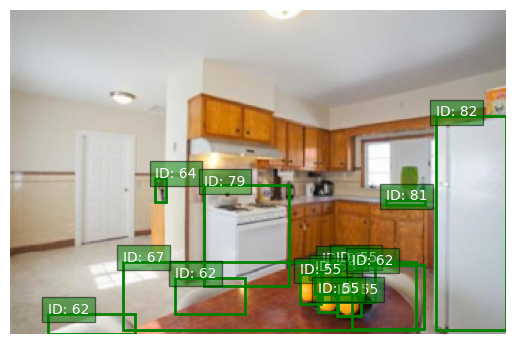

In [76]:
# Plot the image and overlay ground truth bounding boxes
plt.imshow(image)
plt.axis('off')

# Overlay ground truth boxes
for ann in annotations:
    bbox = ann['bbox']
    category_id = ann['category_id']
    x, y, width, height = bbox
    plt.gca().add_patch(plt.Rectangle((x, y), width, height, fill=False, color='green', linewidth=2))
    plt.text(x, y, f"ID: {category_id}", fontsize=10, color='white', bbox=dict(facecolor='green', alpha=0.5))

plt.show()


In [79]:
# Get category names from the COCO dataset
categories = coco.loadCats(category_ids)
category_id_to_name = {cat['id']: cat['name'] for cat in categories}

# Display category names
print(category_id_to_name)

# Example: Display the names for the annotations
for ann in annotations:
    category_id = ann['category_id']
    print(f"Category Name: {category_id_to_name[category_id]}, BBox: {ann['bbox']}")


{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'micro

# Simple Baseline: Object Detection with Score + BLIP

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
!pip install timm

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
resnet = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
def get_object_text(image):
  inputs = processor(images=image, return_tensors="pt")
  outputs = resnet(**inputs)

  # let's only keep detections with score > 0.9
  target_sizes = torch.tensor([image.size[::-1]])
  results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

  # labels = results["labels"]
  # item = [resnet.config.id2label[l.item()] for l in labels]
  # confidence = [score.item() for score in results["scores"]]

  object_text = ""
  for score, label in zip(results["scores"], results["labels"]):
      item = f"Detected {resnet.config.id2label[label.item()]} with confidence {round(score.item(), 3)}"
      object_text += item
      object_text += "\n "
  return object_text

In [ ]:
#raw_image = Image.open().convert("RGB")
get_object_text(dataset['val'][0]['image'])

'Detected person with confidence 0.919\n Detected person with confidence 0.977\n Detected person with confidence 0.986\n Detected motorcycle with confidence 0.909\n Detected car with confidence 0.967\n Detected person with confidence 0.905\n '

In [ ]:
acc = 0
i = 0
for data in dataset['val']:
  question = data['text_input']
  raw_image = data['image']
  answer_candidates = data['choices']
  correct_choice = answer_candidates[data['correct_choice_idx']]

  # use "eval" processors for inference
  image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
  question = question + " To help you reasoning, in the image: " + get_object_text(raw_image)
  question = txt_processors["eval"](question)

  samples = {"image": image, "text_input": question}

  ans = blip.predict_answers(samples, answer_list=answer_candidates, inference_method="rank")

  if ans[0] == correct_choice:
    acc += 1
  i += 1
  if i%100 == 0:
    print('done 100')


done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100


In [ ]:
acc/i

0.5327510917030568

# 2. ALBEF

In [ ]:
model2, vis_processors, txt_processors = load_model_and_preprocess(name="albef_vqa", model_type="vqav2", is_eval=True, device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 4.33G/4.33G [01:40<00:00, 46.3MB/s]
/usr/local/lib/python3.10/dist-packages/lavis/models/base_model.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  che

In [ ]:
dataset['val']

In [ ]:

acc = 0
i = 0
for data in dataset['val']:
  question = data['text_input']
  raw_image = data['image']
  answer_candidates = data['choices']
  correct_choice = answer_candidates[data['correct_choice_idx']]

  # use "eval" processors for inference
  image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
  question = txt_processors["eval"](question)

  samples = {"image": image, "text_input": question}

  ans = model2.predict_answers(samples, answer_list=answer_candidates, inference_method="rank")

  if ans[0] == correct_choice:
    acc += 1
  i += 1
  if i%100 == 0:
    print('done 100')



done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100


In [ ]:
acc/i

0.6655021834061136